In [25]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
img = cv2.imread('UBIRIS_200_150_R/Sessao_1/1/Img_1_1_1.jpg') 

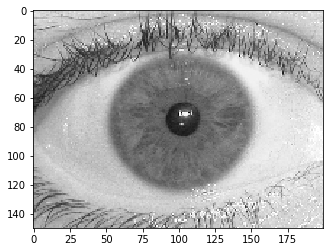

In [5]:
plt.imshow(img)

In [6]:
img.shape

(150, 200, 3)

In [7]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

In [8]:
img.shape


(150, 200)

In [9]:
img2 = img.reshape(-1)
df = pd.DataFrame()
df['Original Image'] = img2

In [13]:
df.head(10)

Original Image
0             205
1             210
2             200
3             205
4             205
5             194
6             176
7             176
8             196
9             199

In [11]:
200 *150

30000

In [14]:
df.shape

(30000, 1)

In [15]:
num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []  #Create empty list to hold all kernels that we will generate in a loop
for theta in range(8):   #Define number of thetas. Here only 2 theta values 0 and 1/4 . pi 
    theta = theta / 4. * np.pi
    for sigma in (1, 3, 5, 7):  #Sigma with values of 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
                           
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
#                print(gabor_label)
                ksize=5  #Try 15 for hidden image. Or 9 for others
                phi = 0  #0.8 for hidden image. Otherwise leave it to 0
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)                
                filtered_img = fimg.reshape(-1)
                
                cv2.imwrite('images/gabor_filtered_images/'+gabor_label+'.jpg', filtered_img.reshape(img.shape))

                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                
                num += 1  #Increment for gabor column label
                
print(df.head())

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

Gabor112 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor113 : theta= 2.356194490192345 : sigma= 5 : lamda= 0.0 : gamma= 0.05
Gabor114 : theta= 2.356194490192345 : sigma= 5 : lamda= 0.0 : gamma= 0.5
Gabor115 : theta= 2.356194490192345 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor116 : theta= 2.356194490192345 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor117 : theta= 2.356194490192345 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor118 : theta= 2.356194490192345 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor119 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor120 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor121 : theta= 2.356194490192345 : sigma= 7 : lamda= 0.0 : gamma= 0.05
Gabor122 : theta= 2.356194490192345 : sigma= 7 : lamda= 0.0 : gamma= 0.5
Gabor123 : theta= 2.356194490192345 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.05
G

Gabor214 : theta= 4.71238898038469 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor215 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor216 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor217 : theta= 4.71238898038469 : sigma= 7 : lamda= 0.0 : gamma= 0.05
Gabor218 : theta= 4.71238898038469 : sigma= 7 : lamda= 0.0 : gamma= 0.5
Gabor219 : theta= 4.71238898038469 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor220 : theta= 4.71238898038469 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor221 : theta= 4.71238898038469 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor222 : theta= 4.71238898038469 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor223 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor224 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor225 : theta= 5.497787143782138 : sigma= 1 : lamda= 0.0 : gamma= 0.0

In [26]:
df.head()

Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0             205       0       0     255     255     171     137      80   
1             210       0       0     255     255     172     137      81   
2             200       0       0     255     255     171     137      80   
3             205       0       0     255     255     170     135      80   
4             205       0       0     255     255     164     132      77   

   Gabor8  Gabor9  Gabor10  Gabor11  Gabor12  Gabor13  Gabor14  Gabor15  \
0      64       0        0        0        0        0        0      255   
1      64       0        0        0        0        0        0      255   
2      64       0        0        0        0        0        0      255   
3      64       0        0        0        0        0        0      253   
4      62       0        0        0        0        0        0      244   

   Gabor16  Gabor17  Gabor18  Gabor19  Gabor20  Gabor21  Gabor22  Gabor23  \
0      249        0        0        0        0        0        0      255   
1      250        0        0        0        0        0        0      255   
2      248        0        0        0        0        0        0      255   
3      246        0        0        0        0        0        0      255   
4      238        0        0        0        0        0        0      255   

   Gabor24  Gabor25  Gabor26  Gabor27  Gabor28  Gabor29  Gabor30  Gabor31  \
0      255        0        0        0        0        0        0      255   
1      255        0        0        0        0        0        0      255   
2      255        0        0        0        0        0        0      255   
3      255        0        0        0        0        0        0      255   
4      255        0        0        0        0        0        0      255   

   Gabor32  Gabor33  Gabor34  Gabor35  Gabor36  Gabor37  Gabor38  Gabor39  \
0      255        0        0      255      255      119       23      255   
1      255        0        0      255      255      130       27      255   
2      255        0        0      255      255      124       24      255   
3      255        0        0      255      255      124       25      255   
4      255        0        0      255      255      112       22      255   

   Gabor40  Gabor41  Gabor42  Gabor43  Gabor44  Gabor45  Gabor46  Gabor47  \
0      134        0        0      255      255       93       78      234   
1      133        0        0      255      255      113       96      236   
2      134        0        0      255      255       98       82      246   
3      131        0        0      255      255      104       88      233   
4      128        0        0      255      255       92       78      209   

   Gabor48  Gabor49  Gabor50  Gabor51  Gabor52  Gabor53  Gabor54  Gabor55  \
0      210        0        0      255      255       93       87      255   
1      212        0        0      255      255      114      108      255   
2      221        0        0      255      255       98       92      255   
3      209        0        0      255      255      104       98      255   
4      186        0        0      255      255       93       87      246   

   Gabor56  Gabor57  Gabor58  Gabor59  Gabor60  Gabor61  Gabor62  Gabor63  \
0      255        0        0      255      255       93       90      255   
1      255        0        0      255      255      115      111      255   
2      255        0        0      255      255       98       95      255   
3      255        0        0      255      255      105      102      255   
4      238        0        0      255      255       93       90      255   

   Gabor64  Gabor65  Gabor66  Gabor67  Gabor68  Gabor69  Gabor70  Gabor71  \
0      255        0        0      255      255      153      122       50   
1      255        0        0      255      255      206      164      121   
2      255        0        0      255      255      137      109       42   
3  

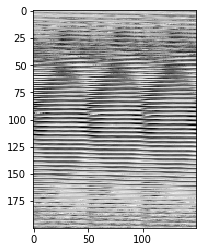

In [34]:
gb_img = df.Gabor40.values.reshape((200, 150))
plt.imshow(gb_img, cmap='gray')

In [44]:
gb_features = list()
gb_df = df.drop('Original Image', 1)
for i in range(1, gb_df.shape[1]):
    f = gb_df[f'Gabor{i}'].values.reshape(200, 150)
    gb_features.append(f)

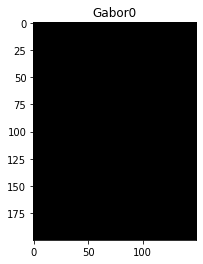

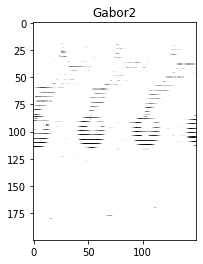

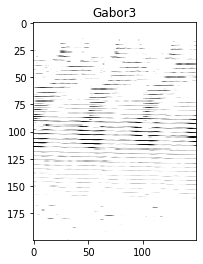

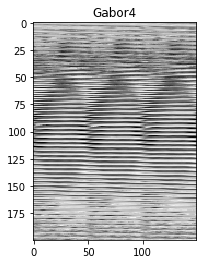

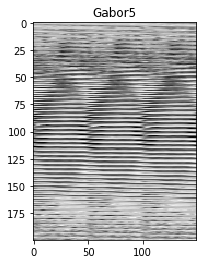

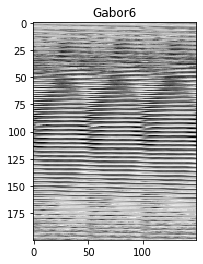

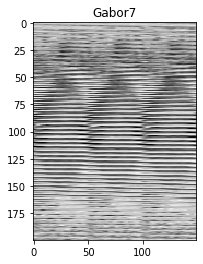

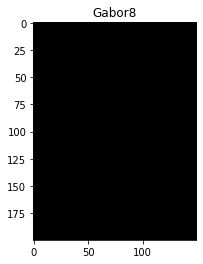

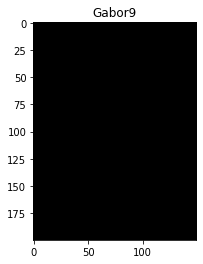

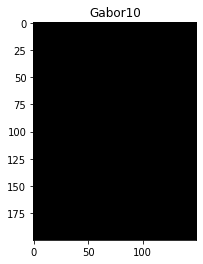

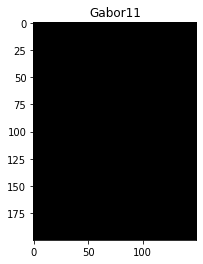

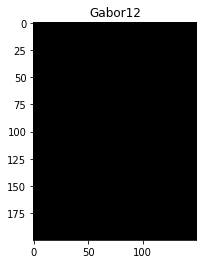

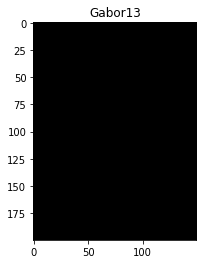

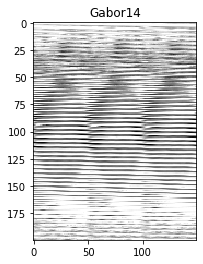

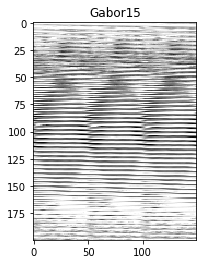

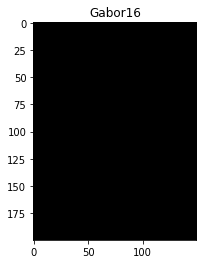

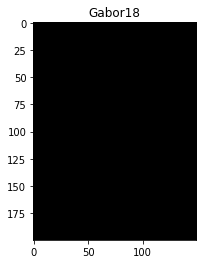

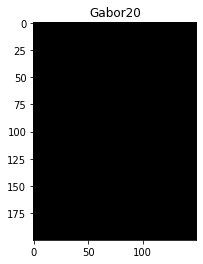

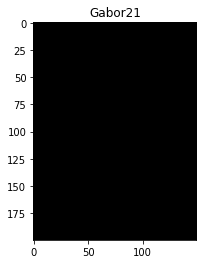

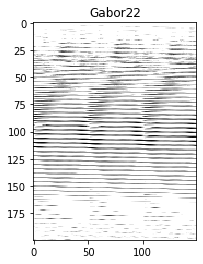

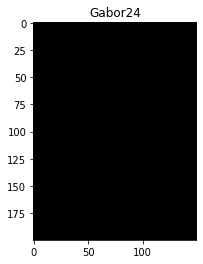

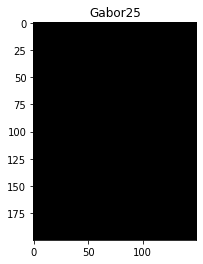

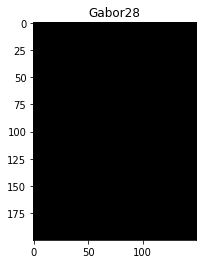

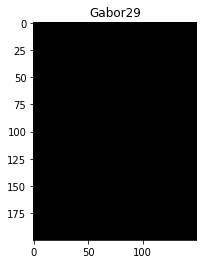

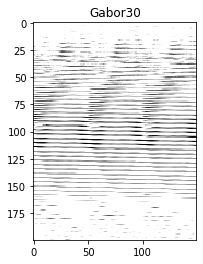

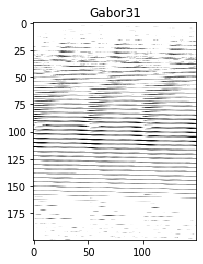

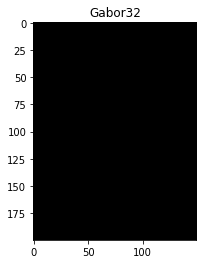

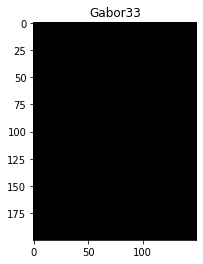

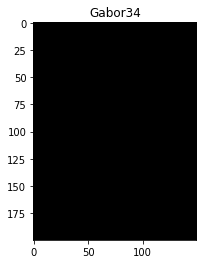

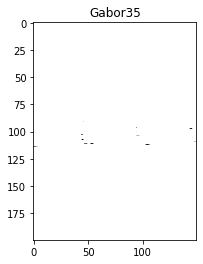

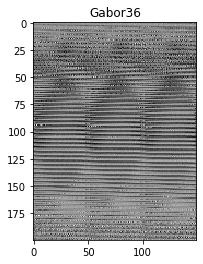

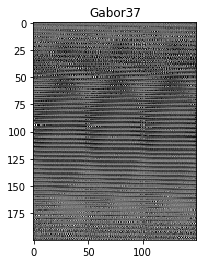

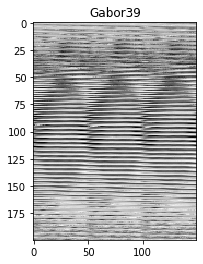

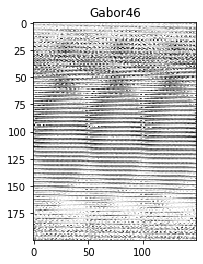

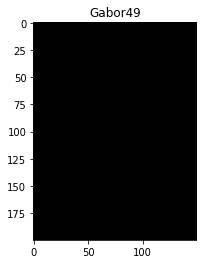

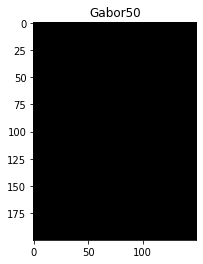

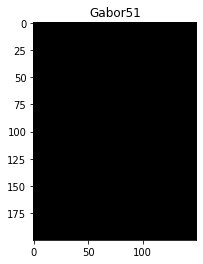

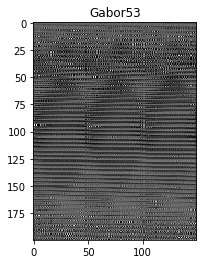

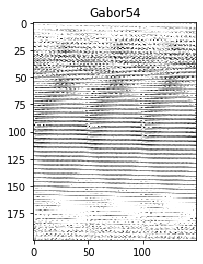

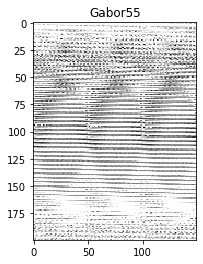

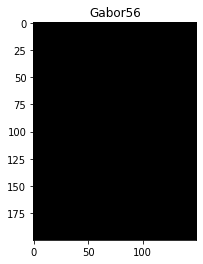

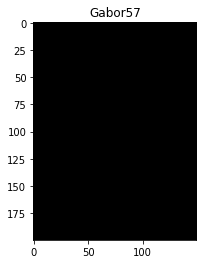

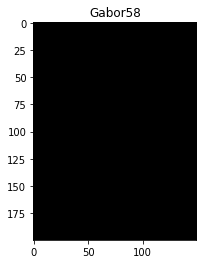

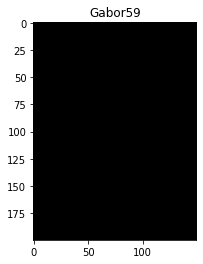

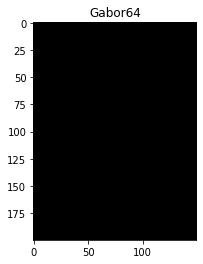

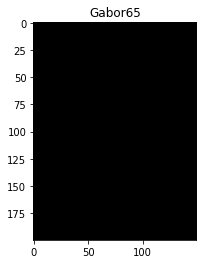

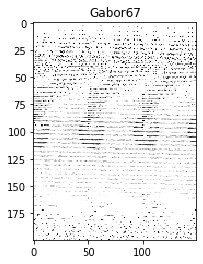

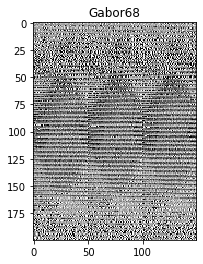

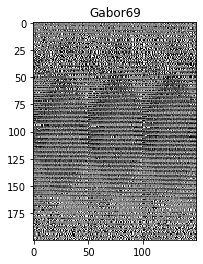

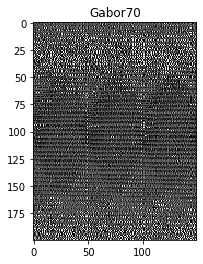

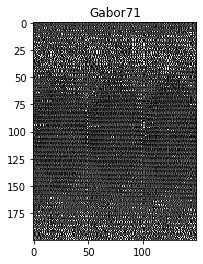

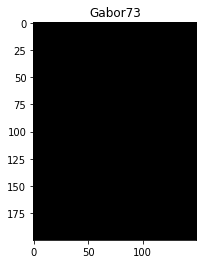

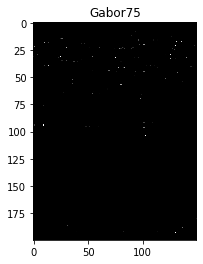

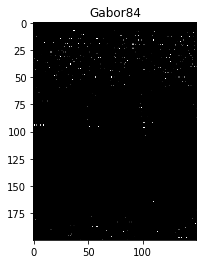

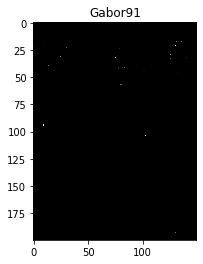

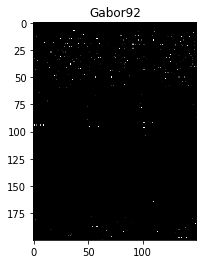

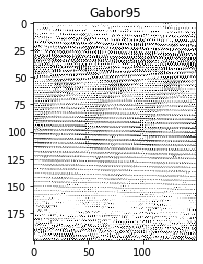

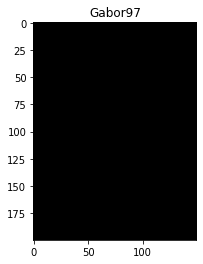

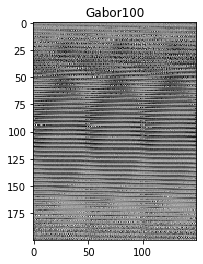

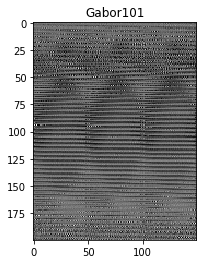

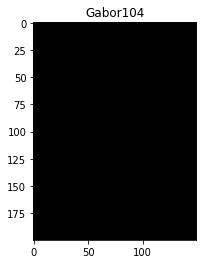

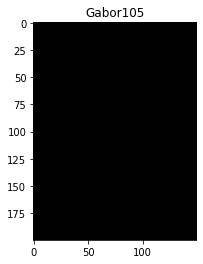

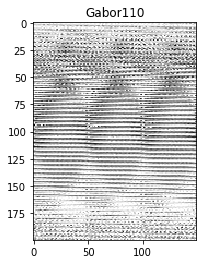

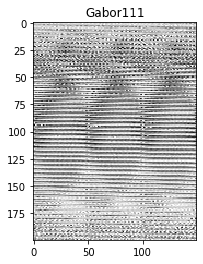

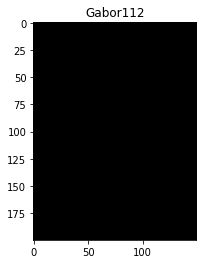

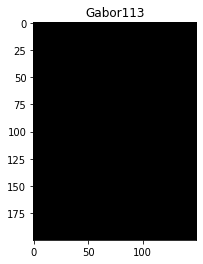

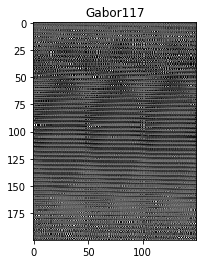

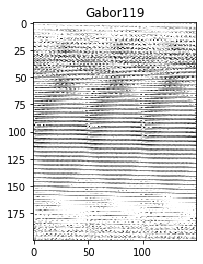

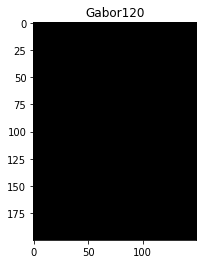

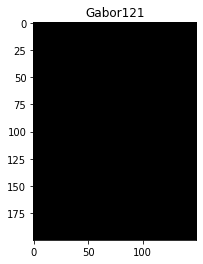

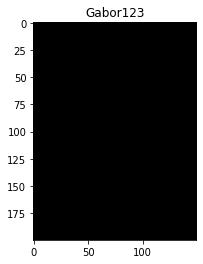

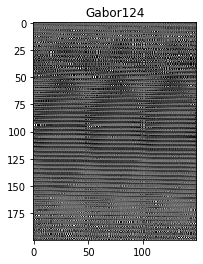

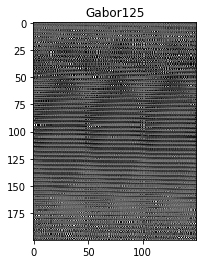

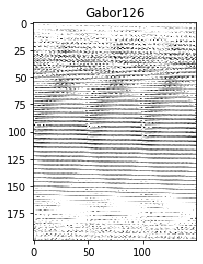

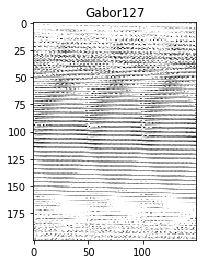

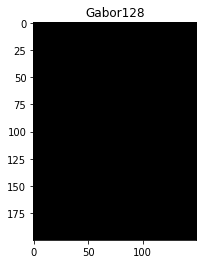

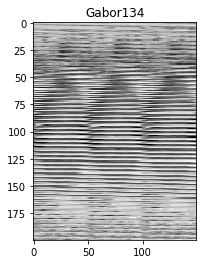

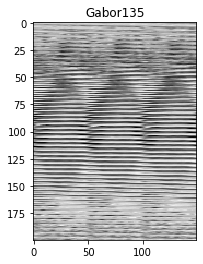

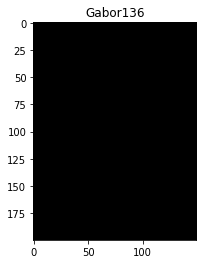

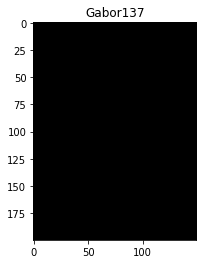

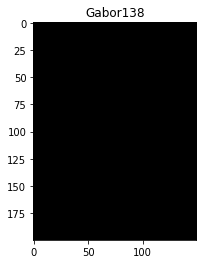

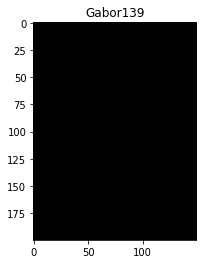

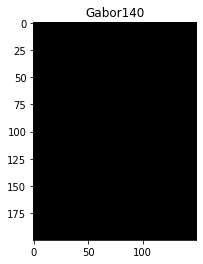

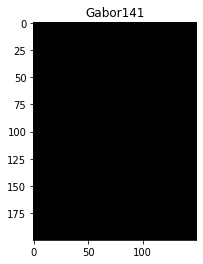

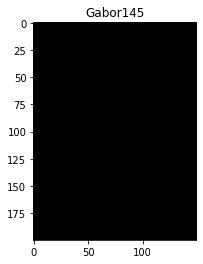

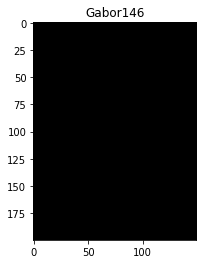

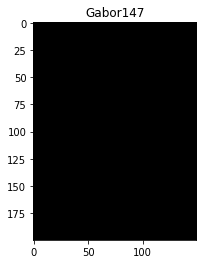

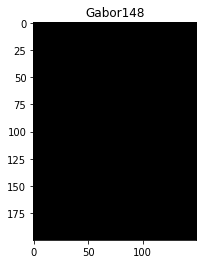

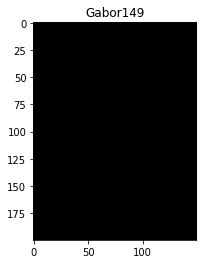

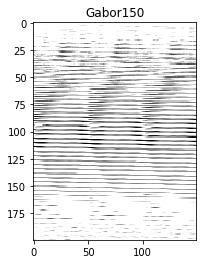

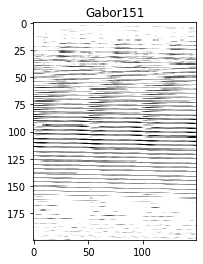

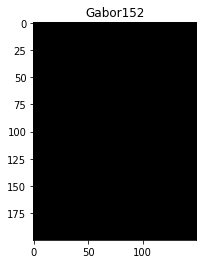

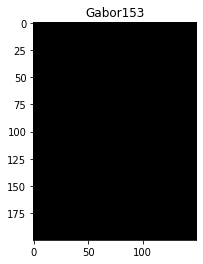

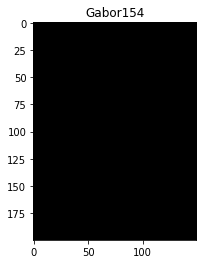

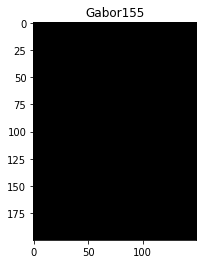

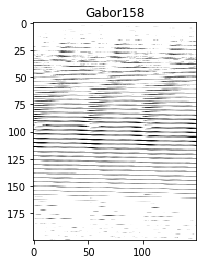

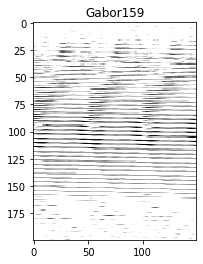

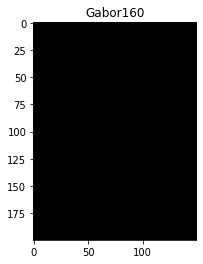

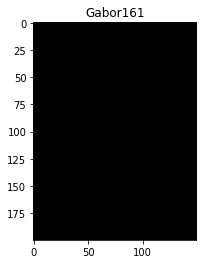

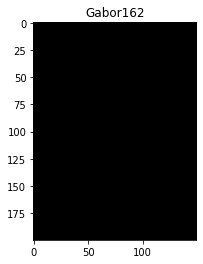

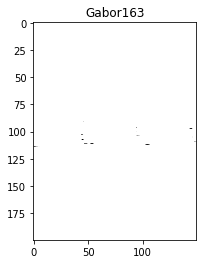

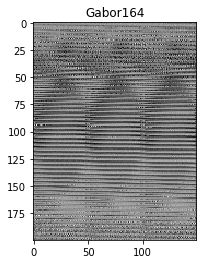

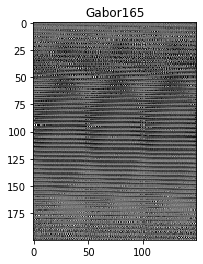

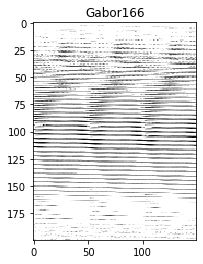

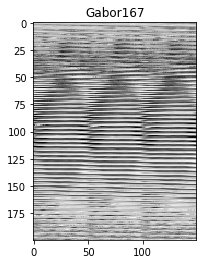

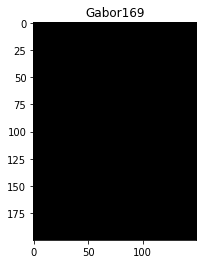

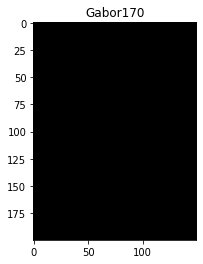

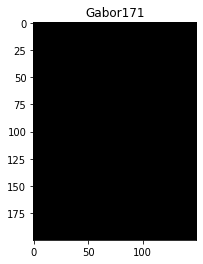

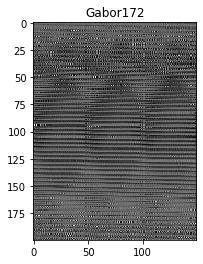

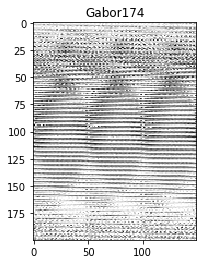

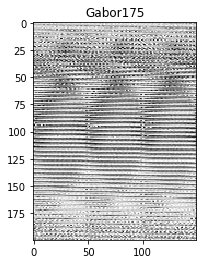

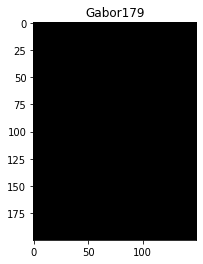

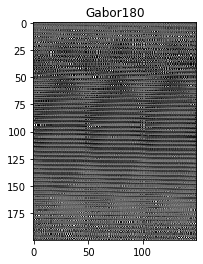

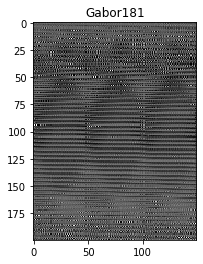

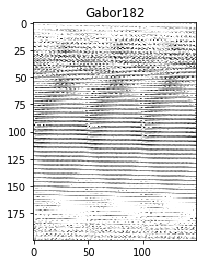

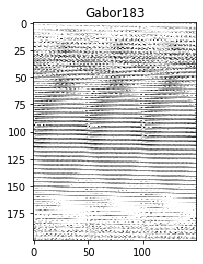

In [ ]:
for i in range(len(gb_features)):
    plt.imshow(gb_features[i], cmap = 'gray')
    plt.title(f'Gabor{i}')
    plt.pause(0.1)